![alt text](https://drive.google.com/uc?export=view&id=1UXScsVx_Wni_JuDdB8LeTnM6jsPfIwkW)

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

# Face Mask Prediction using U-Net
Task is to predict the mask around the face in a given image.

# Instructions
- Some part of the code is already done for you
- You need to execute all the cells
- You need to add the code where ever you see `"#### Add your code here ####"`
- Marks are mentioned along with the cells

## Dataset
Faces in images marked with bounding boxes. Have around 409 images with around 1000 faces manually tagged via bounding box.
- Data file name: images.npy

### Mount Google drive if you are using google colab
- We recommend using Google Colab as you can face memory issues and longer runtimes while running on local

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd '/content/drive/MyDrive/AI-ML/ACV_Project_GL/Face_Mask_Prediction'

/content/drive/MyDrive/AI-ML/ACV_Project_GL/Face_Mask_Prediction


### Load the "images.npy" file (2 marks)
- This file contains images with details of bounding boxes

In [3]:
import numpy as np
data = np.load('images.npy', allow_pickle=True)

### Check one sample from the loaded "images.npy" file  (2 marks)
- Hint: print data[10][1] 

In [4]:
print(data.shape)

(409, 2)


In [5]:
from random import randint
for i in np.arange(0,5):
  r = randint(0, data.shape[0]-1)
  print('Image#', r+1, '>>', 'Image size:', data[r][0].shape, ';', '# Image labels:', len(data[r][1]))

Image# 408 >> Image size: (514, 935, 3) ; # Image labels: 2
Image# 298 >> Image size: (360, 640, 3) ; # Image labels: 2
Image# 33 >> Image size: (1118, 715, 3) ; # Image labels: 4
Image# 23 >> Image size: (386, 525, 3) ; # Image labels: 2
Image# 297 >> Image size: (510, 500, 3) ; # Image labels: 1


In [6]:
# Sample check: Labels for 101th image
data[100][1]

[{'imageHeight': 720,
  'imageWidth': 1280,
  'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.26327193932827736, 'y': 0.18497109826589594},
   {'x': 0.3206933911159263, 'y': 0.28516377649325625}]},
 {'imageHeight': 720,
  'imageWidth': 1280,
  'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.4257854821235103, 'y': 0.23121387283236994},
   {'x': 0.49837486457204766, 'y': 0.34104046242774566}]},
 {'imageHeight': 720,
  'imageWidth': 1280,
  'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.6197183098591549, 'y': 0.29865125240847784},
   {'x': 0.6988082340195017, 'y': 0.4624277456647399}]}]

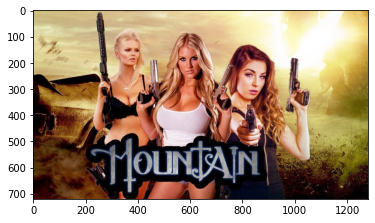

In [7]:
# Sample check: Print 101th image
import matplotlib.pyplot as plt
_ = plt.imshow(data[100][0])

409 images in the dataset. Each of the images has different size and they look to be colored images (3 channels). Also, each image has differing number of faces. 

### Set image dimensions   (1 mark)
- Initialize image height, image width with value: 224 

In [8]:
IMAGE_HEIGHT = 224
IMAGE_WIDTH = 224

### Create features and labels
- Here feature is the image
- The label is the mask
- Images will be stored in "X" array
- Masks will be stored in "masks" array

In [9]:
import cv2
from tensorflow.keras.applications.mobilenet import preprocess_input

masks = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH))
X = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH, 3))
for index in range(data.shape[0]):
    img = data[index][0]
    img = cv2.resize(img, dsize=(IMAGE_HEIGHT, IMAGE_WIDTH), interpolation=cv2.INTER_CUBIC)
    try:
      img = img[:, :, :3]
    except:
      continue
    X[index] = preprocess_input(np.array(img, dtype=np.float32))
    for i in data[index][1]:
        x1 = int(i["points"][0]['x'] * IMAGE_WIDTH)
        x2 = int(i["points"][1]['x'] * IMAGE_WIDTH)
        y1 = int(i["points"][0]['y'] * IMAGE_HEIGHT)
        y2 = int(i["points"][1]['y'] * IMAGE_HEIGHT)
        masks[index][y1:y2, x1:x2] = 1

### Split the data into training and testing (2 marks)
- 400 images in training
- 9 images in testing data

In [10]:
from sklearn.model_selection import train_test_split
a, b, c, d = train_test_split(X, masks, test_size=9, random_state=1)

Training data

In [11]:
X_train = a
y_train = c

Testing data

In [12]:
X_test = b
y_test = d

In [13]:
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (400, 224, 224, 3)
y_train: (400, 224, 224)
X_test: (9, 224, 224, 3)
y_test: (9, 224, 224)


### Print a sample training image, image array and its mask (2 marks)

Print the image and image array

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


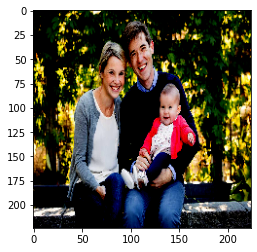

In [14]:
# Sample check: Print 52nd training image
_ = plt.imshow(X_train[51])

In [15]:
# Sample check: Print 52nd training image array
X_train[51]

array([[[-0.48235291, -0.35686272, -0.73333335],
        [-0.63921571, -0.52156866, -0.96078432],
        [-0.56078434, -0.46666664, -0.97647059],
        ...,
        [-0.25490195, -0.12941176, -0.3098039 ],
        [-0.67058825, -0.54509807, -0.85882354],
        [-0.53725493, -0.41176468, -0.7019608 ]],

       [[-0.42745095, -0.31764704, -0.70980394],
        [-0.64705884, -0.54509807, -0.98431373],
        [-0.51372552, -0.42745095, -0.93725491],
        ...,
        [-0.28627449, -0.17647058, -0.40392154],
        [-0.81176472, -0.69411767, -1.        ],
        [-0.66274512, -0.54509807, -0.86666667]],

       [[-0.3098039 , -0.23137254, -0.62352943],
        [-0.43529409, -0.36470586, -0.78039217],
        [-0.30196077, -0.23137254, -0.7019608 ],
        ...,
        [-0.53725493, -0.45098037, -0.74117649],
        [-0.81960785, -0.72549021, -1.        ],
        [-0.8509804 , -0.73333335, -1.        ]],

       ...,

       [[-0.18431371, -0.19999999, -0.19215685],
        [-0

Print the mask

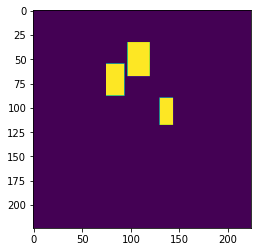

In [16]:
# Sample check: Print 52nd training image (face) masks
_ = plt.imshow(y_train[51])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


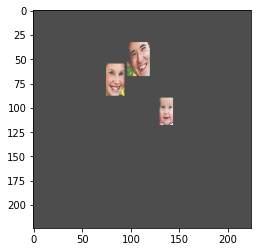

In [17]:
# Sample check: Impose actual mask on training image
import copy
train_img_act_mask = copy.deepcopy(X_train[51])

train_img_act_mask[:,:,0] = y_train[51]*X_train[51][:,:,0]
train_img_act_mask[:,:,1] = y_train[51]*X_train[51][:,:,1]
train_img_act_mask[:,:,2] = y_train[51]*X_train[51][:,:,2]

_ = plt.imshow(train_img_act_mask, alpha=0.7)

In [18]:
# Sample check: Print 52nd training image mask array
y_train[51]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Create the model (5 marks)
- Add MobileNet as model with below parameter values
  - input_shape: IMAGE_HEIGHT, IMAGE_WIDTH, 3
  - include_top: False
  - alpha: 1.0
  - weights: "imagenet"
- Add UNET architecture layers
  - This is the trickiest part of the project, you need to research and implement it correctly

In [19]:
import tensorflow
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.layers import Reshape, UpSampling2D, Concatenate, Conv2D, BatchNormalization, Activation, Dropout, SpatialDropout2D
from tensorflow.keras.models import Model
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

In [20]:
def conv2d_block(input_tensor, n_filters, kernel_size=(3,3), strides=(1,1)):
  """Function to add convolutional layers with the parameters passed to it"""
  # first layer
  z = Conv2D(filters=n_filters, kernel_size=kernel_size, strides=strides, padding='same', kernel_initializer='he_normal')(input_tensor)
  z = BatchNormalization()(z)
  z = Activation('relu')(z)
  
  # second layer
  z = Conv2D(filters=n_filters, kernel_size=kernel_size, strides=strides, padding='same', kernel_initializer='he_normal')(z)
  z = BatchNormalization()(z)
  z = Activation('relu')(z)

  return z

In [21]:
def create_model(trainable=True):
  model = MobileNet(input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3), include_top=False, alpha=1.0, weights="imagenet")

  for layer in model.layers:
    layer.trainable = trainable

  # Encoder/Contraction path: down-sampled image, gives info more on "what" is in the image vs "where" is in the image
  # Note: Image width and height keep getting halved (stride = 2) while depth getting doubled (doubling no. of filters) per MobileNet architecture
  # Get last layer from each depthwise separable convolution blocks 1, 3, 5, 11 and 13
  block1, block2, block3, block4, block5 = [model.get_layer(name='conv_pw_{}_relu'.format(i)).output for i in [1, 3, 5, 11, 13]]

  # Decoder/Expansion path: Up-sample following U-Net architecture layers
  # Skip connection: concatenating the output of UpSampling2D with the feature maps from the Encoder at the same level
  U1 = Concatenate()([UpSampling2D()(block5), block4])
  # Dropout layer
  U1 = Dropout(0.10)(U1)
  # Two consecutive 2D Convolution Layers applied with padding
  U1 = conv2d_block(U1, 16, (1,1))

  # Skip connection: concatenating the output of UpSampling2D with the feature maps from the Encoder at the same level
  U2 = Concatenate()([UpSampling2D()(U1), block3])
  # Dropout layer
  U2 = Dropout(0.10)(U2)
  # Two consecutive 2D Convolution Layers applied with padding
  U2 = conv2d_block(U2, 8, (1,1))

  # Skip connection: concatenating the output of UpSampling2D with the feature maps from the Encoder at the same level
  U3 = Concatenate()([UpSampling2D()(U2), block2])
  # Dropout layer
  U3 = Dropout(0.10)(U3)
  # Two consecutive 2D Convolution Layers applied with padding
  #U3 = conv2d_block(U3, 8, (1,1))

  # Skip connection: concatenating the output of UpSampling2D with the feature maps from the Encoder at the same level
  U4 = Concatenate()([UpSampling2D()(U3), block1])
  # Dropout layer
  #U4 = Dropout(0.10)(U4)
  # Two consecutive 2D Convolution Layers applied with padding
  #U4 = conv2d_block(U4, 4, (1,1))
  
  # Skip connection: concatenating the output of UpSampling2D with the model input
  U5 = Concatenate()([UpSampling2D()(U4), model.input])
  # Dropout layer
  #U5 = Dropout(0.10)(U5)
  # Two consecutive 2D Convolution Layers applied with padding
  #U5 = conv2d_block(U5, 4, (1,1))
  U5 = SpatialDropout2D(0.20)(U5)

  # Sigmoid activation function to ensure mask pixels are in [0, 1] range
  out = Conv2D(filters=1, kernel_size=(1,1), activation="sigmoid")(U5)

  return Model(inputs=model.input, outputs=out)

### Call the create_model function (1 mark)
- Give trainable=False as argument, if you want to freeze lower layers for fast training (but low accuracy)

In [22]:
# Use transfer learnings with frozen encoder weights from MobileNet as it would help training lesser number of weights ...
# ... and provide better control on overfitting given the training sample size is only 400
model = create_model(trainable=False)

### Print model summary (1 mark)

In [23]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 32) 128         conv1[0][0]                      
__________________________________________________________________________________________________
conv1_relu (ReLU)               (None, 112, 112, 32) 0           conv1_bn[0][0]                   
______________________________________________________________________________________________

### Define dice coefficient function (2 marks)
- Create a function to calculate dice coefficient


In [24]:
def dice_coefficient(y_true, y_pred):
  numerator = 2 * tensorflow.reduce_sum(y_true * y_pred)
  denominator = tensorflow.reduce_sum(y_true + y_pred)

  return numerator / (denominator + tensorflow.keras.backend.epsilon())

### Define loss function (2 marks)

In [25]:
def loss(y_true, y_pred):
  return binary_crossentropy(y_true, y_pred) - tensorflow.keras.backend.log(dice_coefficient(y_true, y_pred) + tensorflow.keras.backend.epsilon())

### Compile the model (2 marks)
- Complie the model using below parameters
  - loss: use the loss function defined above
  - optimizers: use Adam optimizer
  - metrics: use dice_coefficient function defined above

In [26]:
optimizer = Adam(learning_rate=0.0008, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss=loss, optimizer=optimizer, metrics=[dice_coefficient])

### Define callbacks (2 marks)
- Use ModelCheckpoint
- Use EarlyStopping
- Use ReduceLROnPlateau

In [27]:
checkpoint = ModelCheckpoint(filepath="model-{val_loss:.2f}.h5", monitor="val_loss", verbose=1, save_best_only=True, save_weights_only=True)
earlystop = EarlyStopping(monitor="val_loss", patience=5)
reduceLR = ReduceLROnPlateau(monitor="val_loss", factor=0.2, patience=5, min_lr=1e-6, verbose=1)

callbacks = [checkpoint, earlystop, reduceLR]

### Fit the model (2 marks)
- Fit the model using below parameters
  - epochs: you can decide
  - batch_size: 1
  - callbacks: use the callbacks defined above

In [28]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=1, verbose=1, callbacks=callbacks)

Epoch 1/100
400/400 [==============================] - 15s 23ms/step - loss: 1.8840 - dice_coefficient: 0.2954 - val_loss: 0.9765 - val_dice_coefficient: 0.5376

Epoch 00001: val_loss improved from inf to 0.97648, saving model to model-0.98.h5
Epoch 2/100
400/400 [==============================] - 8s 21ms/step - loss: 1.1369 - dice_coefficient: 0.4898 - val_loss: 1.0861 - val_dice_coefficient: 0.4953

Epoch 00002: val_loss did not improve from 0.97648
Epoch 3/100
400/400 [==============================] - 9s 21ms/step - loss: 1.0193 - dice_coefficient: 0.5368 - val_loss: 0.9612 - val_dice_coefficient: 0.5630

Epoch 00003: val_loss improved from 0.97648 to 0.96118, saving model to model-0.96.h5
Epoch 4/100
400/400 [==============================] - 8s 21ms/step - loss: 0.9528 - dice_coefficient: 0.5695 - val_loss: 1.1790 - val_dice_coefficient: 0.4728

Epoch 00004: val_loss did not improve from 0.96118
Epoch 5/100
400/400 [==============================] - 9s 21ms/step - loss: 0.9388 - 

### Get the predicted mask for a test image   (2 marks)

Show the test image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


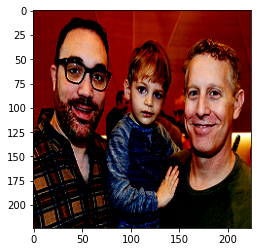

In [29]:
# Print a test image
test_img = X_test[2]
_ = plt.imshow(test_img)

Show original mask for test image

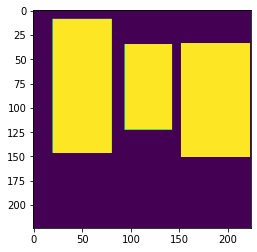

In [30]:
# Print "actual" masks around the faces in the chosen test image
test_mask = y_test[2]
_ = plt.imshow(test_mask)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


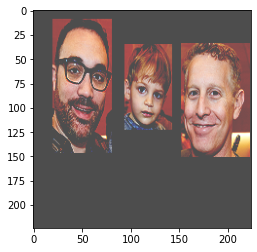

In [31]:
# Impose actual mask on test image
import copy
test_img_act_mask = copy.deepcopy(test_img)

test_img_act_mask[:,:,0] = test_mask*test_img[:,:,0]
test_img_act_mask[:,:,1] = test_mask*test_img[:,:,1]
test_img_act_mask[:,:,2] = test_mask*test_img[:,:,2]

_ = plt.imshow(test_img_act_mask, alpha=0.7)

Predict the mask on the test image

In [32]:
# Predict mask around the faces in the chosen test image
pred_mask = cv2.resize(1.0*(model.predict(x=np.array([test_img]))[0] > 0.5), (IMAGE_WIDTH, IMAGE_HEIGHT))

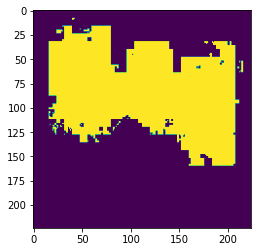

In [33]:
# Plot predicted mask around the "potential" faces in the chosen test image
plt.imshow(pred_mask)

### Impose the mask on the test image (2 marks)
- In imshow use the alpha parameter and set it to greater than 0.5

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


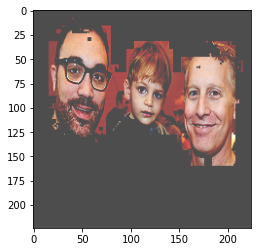

In [34]:
# Impose predicted mask on test image
import copy
test_img_masked = copy.deepcopy(test_img)

test_img_masked[:,:,0] = pred_mask*test_img[:,:,0]
test_img_masked[:,:,1] = pred_mask*test_img[:,:,1]
test_img_masked[:,:,2] = pred_mask*test_img[:,:,2]

_ = plt.imshow(test_img_masked, alpha=0.7)

The problem statement is to predict masks around faces for a given image. We applied U-Net model for this semantic segmentation task, and used pre-trained weights from the MobileNet model (already trained on ImageNet-1000 dataset) for the weights on encoder part. We further upsampled pixels and used skip-connection layers for the decoder part of U-Net and trained weights for this part. Please note that we could alternatively use Conv2DTranspose (Transposed Convolution) to upsample. We ran the model with 20 epochs with batch size 1 (as per instruction provided). It achieved a minimum validation loss of 0.90 at epoch# 8. Looking at the selected test image, we reckon there are 5 faces in all (3 in front and 2 in background). The predicted mask seems to have provided very much a reasonable result, even when compared to the "original" masks in the image that shows 3 distinct faces in the foreground.